# Interactive Blackbody Animation

This notebook uses widgets to illustrate blackbody temperature.

\begin{equation}
B_\nu(T) = \frac{2h\nu^2}{c^3}\frac{1}{e^\frac{h\nu}{k_BT} - 1}
\end{equation}

\begin{equation}
B_\lambda(T) = \frac{2hc^2}{\lambda^5}\frac{1}{e^\frac{hc}{\lambda k_BT} - 1}
\end{equation}

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider, Layout
import warnings
warnings.filterwarnings('ignore')

In [2]:
# High-level parameters
SIZE = 2048     # number of points in each line
T0 = 3.     # log10 K, temperature of blackbody
NU_MIN = 1
NU_MAX = 12
LAM_MIN = -2
LAM_MAX =  5
NSTEPS = 10

# Constants
h = 6e-23
c = 3e10
k_B = 1.3e-16

# Variables derived from parameters above
nus = np.logspace(NU_MIN, NU_MAX, SIZE)
lam = np.logspace(LAM_MIN, LAM_MAX, SIZE)

interactive(children=(FloatSlider(value=3.0, description='Log10 Temperature [K]', layout=Layout(grid_area='foo…

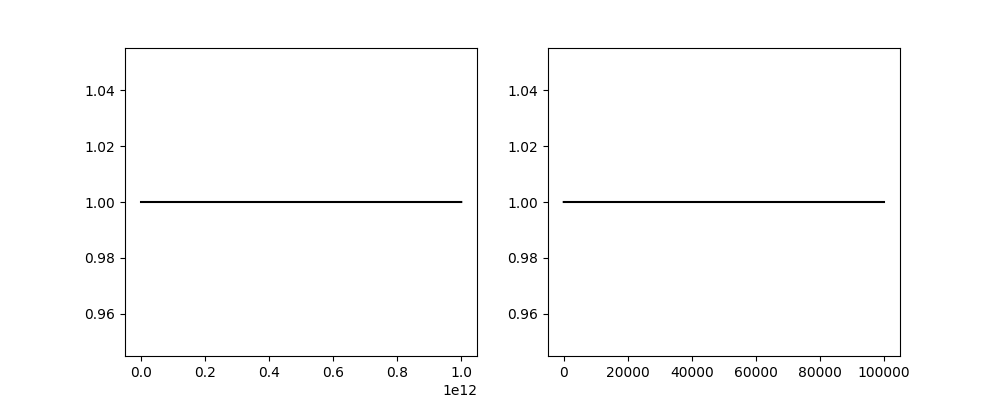

In [5]:
# Generate the animation figure

fig, ax = plt.subplots(ncols=2, figsize=(10,4))
bb_n, = ax[0].plot(nus, np.ones_like(nus), 'k') # holds handle for incoming radiation
bb_l, = ax[1].plot(lam, np.ones_like(lam), 'k') # holds handle for incoming radiation

# Sliders controlling animation
T_widget = FloatSlider(3, min=1, max=5, step=.1,
                           description='Log10 Temperature [K]',
                           style={'description_width':'initial'},
                           layout=Layout(width='auto', grid_area='footer'))

def animate(t):
    '''Update plots for each line according to the time step. Reads dec, dist,
    vra, and vdec from widgets. Called repeatedly by FuncAnimation.'''
    
    T = 10**T_widget.value
    y_n = 2 * h * nus**2 / c**3 / (np.exp(h * nus / (k_B * T)) - 1) * 1e50
    y_l = 2 * h * c**2 / lam**5 / (np.exp(h * c / (lam * k_B * T)) - 1) * 1e50
    bb_n.set_ydata(y_n)
    bb_l.set_ydata(y_l)
    
    
def init():
    '''Set initial plot parameters. Called once by FuncAnimation at beginning.'''
    for _ax in ax:
        _ax.grid(True)
        _ax.set_yscale('log')
        _ax.set_xscale('log')
    ax[0].set_title('$B_\\nu$')
    ax[0].set_xlabel('Frequency [Hz]')
    ax[0].set_ylabel('Specific Intensity [$I_\\nu$]')
    ax[0].set_ylim(1e6, 1e19) # dec
    ax[1].set_title('$B_\\lambda$')
    ax[1].set_xlabel('Wavelength [cm]')
    ax[1].set_ylabel('Specific Intensity [$I_\\lambda$]')
    ax[1].set_ylim(1e36, 1e49) # dec
    
steps = np.linspace(0, 1, NSTEPS) # simulation interval
ani = FuncAnimation(fig, animate, steps, init_func=init, interval=50, blit=True)

def build_animation(T):
    '''Function which causes FuncAnimation to redraw itself when input widgets change.
    Does not actually hand off the value, but needs to accept widget arguments to
    be triggered by updating the slider.'''
    ani.new_frame_seq()

# force animation to redraw when freq_widget changes, even though
# the parameter is not actually passed through (used as global, instead)
interact(build_animation, T=T_widget)
plt.show()